<a href="https://colab.research.google.com/github/rebeccalizaverghese/IBM-Data-Science/blob/main/7.2_Data_Analytics_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Wrangling
Process of converting or mapping data from the initial ‘raw’ form into another format, in order to prepare the data for further analysis.

Methods of Data Wrangling:
* Identifying and handling missing values – missing value condition occurs whenever a data entry is left empty
*	Data formatting – data from different sources may be in various formats, in different units or various conventions and it is necessary to standardize the values into the same format, unit or convention.
*	Data Normalization (centring/ scaling) – different columns of numerical data may have very different ranges making direct comparison often not meaningful – normalization is a way to bring all data into a similar range for more useful comparison.
*	Data Binning – binning creates bigger categories from a set of numerical values – useful for comparison between groups of data
* Turning Categorical Variables to Numeric Variables – makes statistical modelling easier.


In [74]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [75]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(url, header=None)

In [76]:
# Adding Headers:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Identifying & Handling Missing Data
Missing Values: When no data value is stored for a variable/ feature for a particular observation, we can say that this feature has a missing value – it appears as ‘?’, ‘N/A’, ‘0’, ‘NaN’ or just a blank cell.

To replace missing values with actual values, pandas library has a built-in method called ‘replace()’, which can be used to fill in the missing values with the newly calculated values.
Syntax = df.replace(missing_value, new_value)


In [77]:
# Converting '?' to 'NaN'
df.replace('?', np.NaN, inplace = True)
# setting the argument ‘inplace’ to ‘True’ allows the modification to be done on the data set directly – ‘inplace=True’ just writes the result back into the data-frame. It is equivalent to the following line of code => df = df.replace('?', np.NaN).
# It is important to note, that the given line of code (df.replace('?', np.NaN)) does not change the data-frame but it is a good way to make sure that you are performing the correct operation – to modify the data-frame, you have to set the parameter inplace=True
df['normalized-losses'].head(5)

,normalized-losses
0,NaN
1,NaN
2,NaN
3,164
4,164


In [78]:
# Evaluation of Missing Values
# We can use 2 methods (.isnull() || .notnull()) to detect missing data - the output is a boolean value indicating whether the value that is passed into the arguement is in fact missing data
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [79]:
# Count missing values in each column using for loop:
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print("")

symboling
symboling
False    205
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      41
Name: count, dtype: int64

make
make
False    205
Name: count, dtype: int64

fuel-type
fuel-type
False    205
Name: count, dtype: int64

aspiration
aspiration
False    205
Name: count, dtype: int64

num-of-doors
num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
body-style
False    205
Name: count, dtype: int64

drive-wheels
drive-wheels
False    205
Name: count, dtype: int64

engine-location
engine-location
False    205
Name: count, dtype: int64

wheel-base
wheel-base
False    205
Name: count, dtype: int64

length
length
False    205
Name: count, dtype: int64

width
width
False    205
Name: count, dtype: int64

height
height
False    205
Name: count, dtype: int64

curb-weight
curb-weight
False    205
Name: count, dtype: int64

engine-type
engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    205
Nam

### Dropping Missing Values in Python
To remove data that contains missing values, pandas library has a built-in method called ‘dropna()’ – essentially with the dropna method, we can choose to drop rows or columns that contain missing values.
Note,
* We would need to specify **‘axis=0’** to **drop the entire row**.
*	We would need to specify **‘axis=1’** to **drop the entire columns**.
We should only drop whole columns if most entries in the column are empty.


In [80]:
# To drop rows:
df1 = df.dropna(subset=["price"], axis=0).head(5)
df1

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Replacing Missing Values
Since, in the dataset, none of the columns are empty, rather than dropping the columns, it is a better idea to replace the missing values.

To replace missing values with actual values, pandas library has a built-in method called ‘replace()’, which can be used to fill in the missing values with the newly calculated values.

Replace data
* Replace it by mean
* Replace it by frequency
* Replace it based on other functions

Syntax = df.replace(missing_value, new_value)

In [81]:
# REPLACE BY MEAN
# Replace 'NaN' values with average values for normalized-losses
mean_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("The average/ mean of normalized losses are ", mean_loss)

The average/ mean of normalized losses are  122.0


In [82]:
df.replace(np.NaN, mean_loss, inplace=True)
df["normalized-losses"].head(5)

,normalized-losses
0,122.0
1,122.0
2,122.0
3,164
4,164


In [83]:
# Replace 'NaN' with mean value for stroke
mean_stroke = df["stroke"].astype("float").mean(axis=0)
print("The average stroke value is ", mean_stroke)
df.replace(np.NaN, mean_stroke, inplace=True)
df["stroke"].head()

The average stroke value is  5.572390243902437


,stroke
0,2.68
1,2.68
2,3.47
3,3.40
4,3.40


In [84]:
# Replace by frequency
# To see which values are present in a particular column, we can use the ".value_counts()" method
df['num-of-doors'].value_counts()
# We can see that foor-doors are most common type

,count
num-of-doors,
four,114
two,89
122.0,2


In [85]:
# We can also use the "idxmax()" method to calculate the most common type automatically
freq = df['num-of-doors'].value_counts().idxmax()
print("The most common number of doors for cars are", freq)
df['num-of-doors'].replace('?', freq, inplace=True)
df['num-of-doors'].head()


The most common number of doors for cars are four


<ipython-input-85-7c261b792995>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['num-of-doors'].replace('?', freq, inplace=True)


,num-of-doors
0,two
1,two
2,two
3,four
4,four


### Data Formatting
Data is usually collected from different places, by different people and may be stored in different formats. Such data requires Data Formatting for bringing data into a common standard of expression that allows users to make meaningful comparisons and ensures that data is consistent and easily understandable.

#### Incorrect Data types
For a number of reasons, including when you imported dataset into python, the data type may be incorrectly established
It is important for later analysis to explore the feature's data types and covert them to the correct data types, otherwise, the developed models later on may behave strangely and totally valid data may end up being treated like missing data.
In Pandas, you use:

A) .dtype() to check the data type

B) .astype() to change the data type



In [86]:
# To check the data type
df.dtypes

,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


In [87]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [88]:
df.dtypes

,0
symboling,int64
normalized-losses,int64
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


In [89]:
# Transform mpg to l/100km by mathematical operation (235/mpg)
df['city-l/100km'] = 235/df['city-mpg']
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-l/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [90]:
# Transform mpg to l/100km in the column "highway-mpg" and change the column name to 'highway-l/100km'
df['highway-mpg'] = 235/df['highway-mpg']

In [91]:

# Rename column name from "highway-mpg" to highway-l/100km
df.rename(columns={"highway-mpg":'highway-L/100km'}, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-l/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


### Data Normalization
Data Normalization is used to ensure that the range of the variables is consistent so that statistical analyses can be easier down the road. By making the ranges consistent between variables, normalization enables a fairer comparison between the different features, making sure they have the same impact.

To avoid this, we can normalize these two variables into values that range from 0 to 1 – after normalization, both variables have a similar influence on the models we will build later.

Methods:
*	Simple Feature Scaling – divides each value by the maximum value for that feature. – This makes the new values range between 0 and 1.

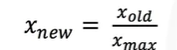

* Min-Max Method – takes each value x_old, subtracts it from the minimum value of that feature (x_min), then divides by the range of that feature (x_max – x_min). The resulting new values range between 0 and 1.

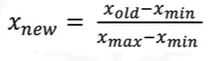

* Score/ Standard Score method – in this formula, for each value, we subtract the mu (which is the average of the feature) and then divide by the standard deviation sigma. The resulting value hovers around zero and typically ranges between -3 and +3, but can be higher or lower.

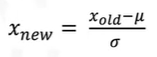


In [92]:
# To demonstrate normalization, say you want to scale the columns "length", "width" and "height"
# Simple Feature Scaling
df['length'] = df['length']/df['length'].max()
df['length']

,length
0,0.811148
1,0.811148
2,0.822681
3,0.848630
4,0.848630
...,...
200,0.907256
201,0.907256
202,0.907256
203,0.907256


In [93]:
# Min-Max Method
df['width'] = (df['width'] - df['width'].min()) / (df['width'].max() - df['width'].min())
df['width']

,width
0,0.316667
1,0.316667
2,0.433333
3,0.491667
4,0.508333
...,...
200,0.716667
201,0.708333
202,0.716667
203,0.716667


In [94]:
# Score/ Standard Score method
df['height'] = (df['height'] - df['height'].mean()) / df['height'].std()
df['height']

,height
0,-2.015483
1,-2.015483
2,-0.542200
3,0.235366
4,0.235366
...,...
200,0.726460
201,0.726460
202,0.726460
203,0.726460


### Binning
Binning refers to when we group values together into bins/ categories. – sometimes it can improve the accuracy of the predictive models – in addition, sometimes we use data binning to group a set of numerical values into a smaller number of bins to have a better understanding of the data distribution.

In [95]:
# convert to correct format
df['horsepower'] = df['horsepower'].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

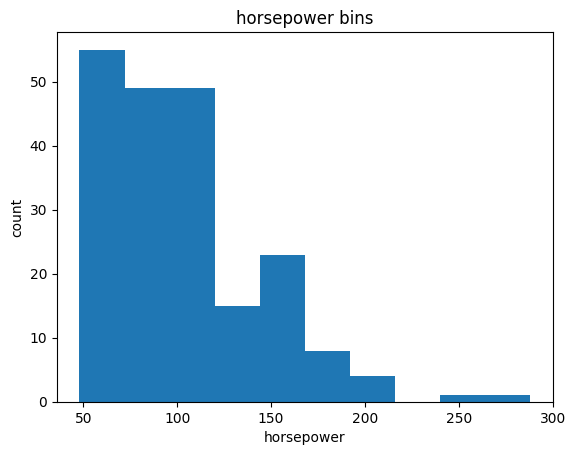

In [96]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [97]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,160,Medium


In [98]:
df["horsepower-binned"].value_counts()

,count
horsepower-binned,
Low,163
Medium,40
High,2


Text(0.5, 1.0, 'horsepower bins')

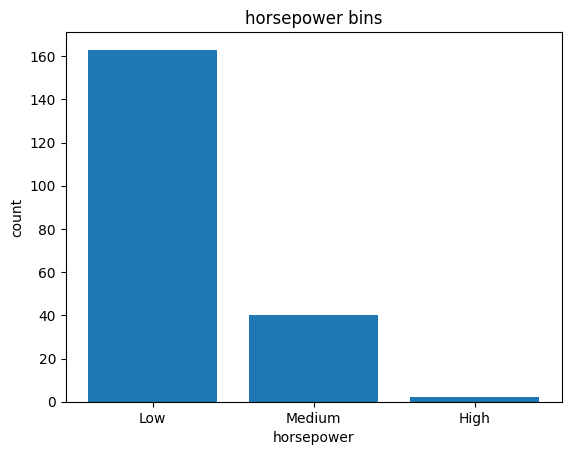

In [99]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

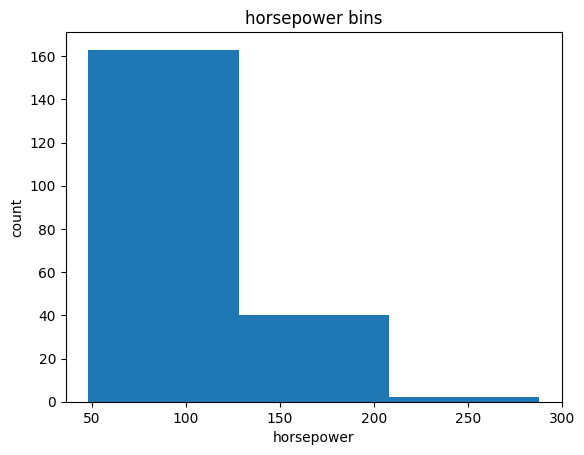

In [100]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

### Turning Categorical Variables into Quantitative Variables in Python

Most statistical models cannot take in objects/ strings as inputs, and for model training, only take numbers as inputs.
We do so by encoding the values – we encode the values  by adding new features corresponding to each unique element in the original feature we would like to encode. In the case where the feature feul has 2 unique values (gas & diesel), we create 2 new features, ‘gas’ and ‘diesel’. When a value occurs in the original feature, we set the corresponding value to 1 in the new feature, the rest of the features are set to 0.


In [101]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-l/100km', 'horsepower-binned'],
      dtype='object')

In [102]:
dummy_variable = pd.get_dummies(df['fuel-type'])
dummy_variable.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [103]:
dummy_variable.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


### **Exercise**

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
file = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
df = pd.read_csv(file, header=0)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [106]:
# Display the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [107]:
# Rounding all values of 'screen_size_cm' to the nearest 2 decimal places
df['Screen_Size_cm'] = np.round(df[['Screen_Size_cm']],2)
df[['Screen_Size_cm']].head()

,Screen_Size_cm
0,35.56
1,39.62
2,39.62
3,33.78
4,39.62


In [108]:
# TASK 1
# Identify missing value
missing_data = df.isnull()
print(missing_data.head())
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print("")

   Unnamed: 0  Manufacturer  Category  Screen    GPU     OS  CPU_core  \
0       False         False     False   False  False  False     False   
1       False         False     False   False  False  False     False   
2       False         False     False   False  False  False     False   
3       False         False     False   False  False  False     False   
4       False         False     False   False  False  False     False   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0           False          False   False           False      False  False  
1           False          False   False           False      False  False  
2           False          False   False           False      False  False  
3           False          False   False           False      False  False  
4           False          False   False           False      False  False  
Unnamed: 0
Unnamed: 0
False    238
Name: count, dtype: int64

Manufacturer
Manufacturer
False    23

In [109]:
# TASK 2
# Replace with Mean
mean = df['Weight_kg'].astype('float').mean(axis=0)
print("The average/ mean of weight_kg is ", mean)
df['Weight_kg'].replace(np.NaN, mean, inplace=True)
df['Weight_kg']

The average/ mean of weight_kg is  1.8622317596566522


<ipython-input-109-02a493782dfc>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight_kg'].replace(np.NaN, mean, inplace=True)


,Weight_kg
0,1.60
1,2.20
2,2.20
3,1.22
4,1.91
...,...
233,1.70
234,1.20
235,1.36
236,2.40


In [110]:
#  Replace with Frequency
freq = df['Screen_Size_cm'].value_counts().idxmax()
print("The most frequent value of screen_size_cm is ", freq)
df['Screen_Size_cm'].replace(np.NaN, freq, inplace=True)
df['Screen_Size_cm']

The most frequent value of screen_size_cm is  39.62


<ipython-input-110-d588f378fe31>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Screen_Size_cm'].replace(np.NaN, freq, inplace=True)


,Screen_Size_cm
0,35.56
1,39.62
2,39.62
3,33.78
4,39.62
...,...
233,35.56
234,33.78
235,30.48
236,39.62


In [111]:
# TASK 3
# Fixing Data Types
df[["Weight_kg","Screen_Size_cm"]] = df[["Weight_kg","Screen_Size_cm"]].astype("float")
df[['Weight_kg', 'Screen_Size_cm']].dtypes

,0
Weight_kg,float64
Screen_Size_cm,float64


In [112]:
# TASK 4
# Data Standardization
# Convert weight from kg to pounds => Where 1kg = 2.205 pounds
df["Weight_kg"] = df["Weight_kg"]*2.205
df.rename(columns={'Weight_kg': "Weight_pounds"}, inplace=True)

# Convert screen size from cm to inch => Where 1 inch = 2.54 cm
df["Screen_Size_cm"] = df['Screen_Size_cm']/2.54
df.rename(columns={'Screen_Size_cm': "Screen_Size_inch"}, inplace=True)

df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,0,Acer,4,IPS Panel,2,1,5,14.000000,1.6,8,256,3.52800,978
1,1,Dell,3,Full HD,1,1,3,15.598425,2.0,4,256,4.85100,634
2,2,Dell,3,Full HD,1,1,7,15.598425,2.7,8,256,4.85100,946
3,3,Dell,4,IPS Panel,2,1,5,13.299213,1.6,8,128,2.69010,1244
4,4,HP,4,Full HD,2,1,7,15.598425,1.8,8,256,4.21155,837


In [113]:
# Task 5
# Data Normalization
df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()
df['CPU_frequency']

,CPU_frequency
0,0.551724
1,0.689655
2,0.931034
3,0.551724
4,0.620690
...,...
233,0.896552
234,0.827586
235,0.896552
236,0.862069


In [114]:
# TASK 5
# Binning
bin = np.linspace(min(df["Price"]), max(df["Price"]), 4)
groups = ['Low', 'Medium', 'High']
df['Price_binned'] = pd.cut(df['Price'], bin, labels=groups, include_lowest=True)
df[['Price', 'Price_binned']]

,Price,Price_binned
0,978,Low
1,634,Low
2,946,Low
3,1244,Low
4,837,Low
...,...,...
233,1891,Medium
234,1950,Medium
235,2236,Medium
236,883,Low


Text(0.5, 1.0, 'Price bins')

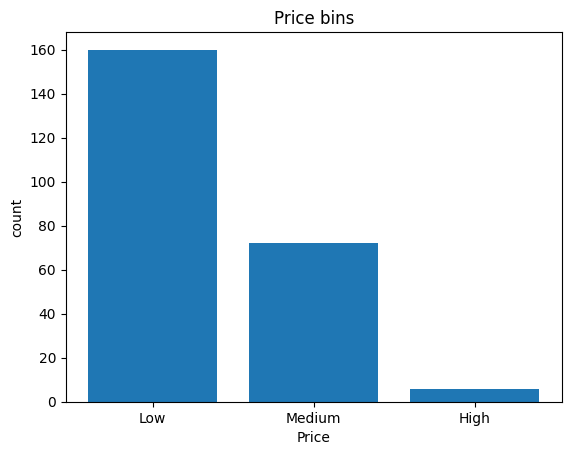

In [115]:
# Plot bar graph on the bins
plt.bar(groups, df["Price_binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")

In [116]:
# TASK 6
# Indicator Variables
#Indicator Variable: Screen
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)
dummy_variable_1.head()

,Screen-Full_HD,Screen-IPS_panel
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False


In [117]:
# drop original column "Screen" from "df"
df.drop("Screen", axis = 1, inplace=True)
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price_binned,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,False,True
1,1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,True,False
2,2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,True,False
3,3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,False,True
4,4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,True,False
